In [39]:
# This notebook runs an A/B split test using t-test for checking

In [40]:
# TODO move to .py format
!pip3 install scipy
!pip3 install numpy
!pip3 install seaborn
#!pip3 install --upgrade pip

In [41]:
import seaborn as sns, numpy as np
from scipy import stats
import numpy as np
import statistics
from scipy.stats import ttest_1samp
import pandas as pd


# TODO add in a main to prompt user between yield calculation cycles
# TODO add in a SQLite saved database
# TODO add in a convert SQLite db_switch to else SQLbd_type
# TODO create a way to track how long the analysis takes per table Batch_Name, DateTime, Batch_Number and meta c&r
# TODO create a way to take a copy of the data, create an output folder, Data_Cleaning else if not exist
# TODO add way to create pivot, or switch to do r^2 and pvalue analysis like https://www.rpubs.com/shubh2565/pvalue-rsquared

print('Running t-tests can be challenging so here is a starter tool I wrote')

print('If we compare crop yeilds from two samples of seed, are they comparable')

# Our Null Hypothesis is that there is no statistically significant different harvest yield weight between YeildA and
# YeildB seed
Null_Hypothesis = "YieldA = YieldB"

# Our Alternate Hypothesis is there is statistically significant different harvest yield weight between YeildA and YeildB
# seeds
Alternate_Hypothesis = "YieldA != YieldB"


# TODO create data digestion function to test YeildA vs YeildB
# TODO copy github data access from healthcare data from github url string.
# https://calcpark.com/random-number-generator/9-5040
YieldA = [4618, 3094, 158, 4701, 2692, 2012, 2569, 1233, 1895, 181, 2045, 4078, 4483, 2970, 1180, 513, 1679, 333, 2815, 4038, 792, 2940, 4140, 1697, 1965, 3569, 1132, 741, 3087, 3447, 3902, 1658, 1252, 1210, 4729, 1387, 3938, 3816, 1156, 885, 47, 1875, 3375, 2359, 4199, 2599, 3970, 3409, 3304, 4142, 3887, 205, 516, 2446, 890, 4250, 3936, 1901, 4401, 1664, 1695, 4536, 1581, 4703, 4433, 692, 4281, 3834, 2602, 4382, 4800, 725, 3468, 4340, 4988, 3559, 1738, 3827, 116, 4537, 4628, 2324, 572, 1362, 3942, 287, 1735, 3297, 3462, 4546, 3309, 1151, 2798, 1297, 7, 1614, 2335, 4394, 2606, 2767, 4221, 2139, 2050, 3818, 1259, 4544, 1228, 2379, 3289, 3703, 44, 1119, 3914, 2742, 4318, 2665, 3728, 2408, 2516, 1599, 4774, 2653, 4450, 1600, 4525, 872, 3314, 1439, 479, 3438, 162, 4682, 1872, 3655, 3693, 449, 1845, 3193, 3514, 51, 3878, 3795, 3452, 875, 4939, 4192, 3868, 227, 4830, 4864, 1072, 4672, 1685, 2184, 2564, 850, 2754, 366, 2026, 455, 866, 4456, 1219, 575, 4115, 2310, 2624, 2200, 467, 4414, 706, 183, 1052, 1890, 4074, 2174, 2409, 239, 1876, 3070, 235, 4163, 4658, 1017, 4955, 4119, 4604, 369, 3802, 566, 1197, 1972, 3326, 3720, 918, 1733, 1682, 3596, 1703, 1691, 2085, 1057, 2863, 3747, 1508, 771, 3804, 541, 1371, 2541, 2732, 4865, 4408, 4704, 2824, 1699, 3478, 1221, 2447, 4108, 4137, 4850, 2920, 3620, 4286, 3467, 3649, 3905, 1257, 3055, 4818, 1010, 698, 580, 579, 3030, 1389, 4475, 26, 4096, 1675, 1313, 2737, 426, 1764, 1457, 389, 2290, 2301, 453, 3584, 2179, 1265, 1806, 3059, 2609, 4968, 1488, 2011, 1298, 1231, 3101, 760, 1914, 1044, 1645, 2128, 2820, 1799, 1629, 2119, 3494, 36, 3699, 1261, 4977, 4033, 3011, 2055, 1760, 3039, 3239, 535, 1515, 4635, 3517, 2155, 1110, 910, 4370, 4010, 1573, 2605, 385, 4531, 830, 4692, 3920, 1498, 228, 1129, 1612, 3003, 3471, 4333, 1496, 3108, 4201, 2462, 1404, 2649, 4895, 978, 5018, 1109, 1497, 2977, 4056, 3474, 664, 3958, 4256, 2717, 3764, 1880, 1671, 1782, 2169, 2209, 329, 2562, 4312, 4278, 4328, 4788, 893, 653, 2582, 892, 4623, 15, 3597, 3951, 1507, 4047, 851, 4125, 4123, 3812, 4470, 2065, 2486, 283, 4638, 1502, 4075, 2961, 4426, 4460, 1933, 3074, 1556, 354, 2418, 2968, 1328, 1443, 1807, 1360, 4999, 3159, 1344, 1225, 1957, 494, 4681, 3659, 2803, 1925, 1906, 644, 186, 289, 609, 3056, 4872, 126, 40, 1871, 1459, 1067, 2729, 4803, 627, 330, 641, 4335, 536, 4663, 1503, 906, 3295, 182, 151, 723, 3765, 571, 2117, 374, 1189, 1307, 3163, 4436, 3296, 1913, 810, 265, 3060, 2885, 783, 953, 765, 1406, 2429, 2150, 4225, 3394, 603, 1171, 4285, 970, 4515, 3182, 390, 3740, 1341, 929, 4321, 4196, 1112, 1948, 1532, 83, 4241, 856, 3927, 3657, 509, 2869, 2320, 3402, 48, 2031, 1237, 3603, 4468, 4650, 1382, 4378, 3568, 2871, 2524, 163, 1278, 174, 4236, 2264, 3099, 3047, 2385, 2083, 4723, 1857, 37, 2895, 3692, 2515, 247, 1481, 2702, 3024, 1077, 731, 2361, 646, 3225, 246, 2373, 3862, 1165, 86, 4173, 2643, 2355, 4311, 777, 1700, 3240, 2975, 405, 4300, 2262, 4680, 3077, 4195, 3487, 819, 4391, 4605, 3654, 809, 2633, 3650, 4368, 3454, 2037, 2517, 1428, 751, 887, 3417, 4667, 4587, 3278, 1042, 4473, 1113, 2731, 3243, 4951, 1111, 1624, 3292, 203, 4533, 1332, 1276, 1820, 673, 1544, 2170, 2691, 3896, 3592, 3980, 683, 4332, 4490, 4090, 93, 633, 320, 1061, 4912, 4136, 4700, 3310, 1321, 4046, 4223, 3671, 2427, 256, 1244, 3510, 2225, 1028, 19, 3414, 3688, 749, 975, 4772, 543, 133, 3821, 2855, 4805, 2743, 2253, 1199, 2252, 1302, 3412, 1598, 3009, 3179, 870, 595, 517, 76, 4061, 2480, 2637, 2909, 1661, 1161, 772, 4508, 2172, 3580, 4067, 2574, 946, 3639, 2414, 3095, 4086, 2298, 2397, 1286, 784, 2520, 141, 2442, 3166, 1681, 2616, 2749, 1962, 2281, 1100, 824, 2278, 742, 3664, 3112, 120, 1910, 2728, 4110, 1731, 4529, 2575, 4813, 1279, 3451, 2129, 4156, 2572, 3858, 1393, 3109, 4087, 4636, 4389, 3352, 1358, 1842, 3153, 1755, 4590, 1882, 4295, 2041, 3726, 2919, 4726, 2978, 3306, 3064, 608, 3735, 3853, 629, 869, 1464, 2077, 3186, 2052, 4768, 2706, 5015, 2693, 825, 3690, 418, 1853, 2425, 4570, 164, 4497, 376, 2533, 894, 2953, 2030, 2972, 2991, 1730, 1349, 3577, 1495, 1224, 2571, 121, 4541, 4227, 843, 4200, 1429, 3084, 3177, 557, 3198, 2654, 4390, 1924, 752, 433, 1878, 2589, 2221, 998, 358, 1030, 1762, 2144, 3222, 3543, 3965, 1527, 1831, 1318, 2898, 1422, 3068, 4022, 2997, 2460, 524, 1977, 125, 2661, 4419, 2230, 992, 398, 4214, 2799, 321, 207, 4101, 3431, 561, 2411, 3328, 539, 4791, 4242, 3588, 618, 4684, 200, 1181, 2800, 2152, 3787, 1065, 3302, 4054, 243, 2297, 2682, 4528, 3623, 3353, 665, 4586, 4513, 4519, 3308, 3739, 814, 2903, 2971, 1826, 2632, 4929, 596, 1083, 2646, 3565, 1684, 4832, 3294, 4371, 3025, 3293, 4051, 2921, 565, 223, 4062, 2364, 4219, 3450, 2984, 4423, 2231, 1022, 1603, 1192, 2876, 3625, 273, 2345, 4662, 1331, 2561, 4898, 1226, 3076, 3562, 3563, 4677, 1376, 3724, 3463, 1032, 4871, 2773, 2764, 1425, 4147, 5009, 4240, 5010, 3727, 4963, 3753, 1688, 886, 1637, 3683, 229, 761, 2733, 3831, 1234, 514, 3561, 463, 1378, 714, 1160, 606, 5002, 3892, 4424, 3733, 4642, 4522, 2451, 3307, 3658, 2812, 3492, 356, 2673, 3549, 4690, 989, 2381, 4606, 2275, 1616, 2286, 1609, 4698, 1673, 1194, 604, 1541, 371, 838, 3856, 2734, 1253, 628, 4739, 635, 2251, 4737, 3833, 2496, 3716, 29, 3566, 250, 1266, 658, 3940, 2197, 2234, 2120, 1571, 1974, 1568, 4158, 2615, 1993, 2805, 2989, 500, 902, 4787, 4487, 4098, 2816, 2164, 2040, 1094, 1791, 4767, 2220, 1846, 4877, 5003, 4847, 4298, 2424, 2378, 1950, 4357, 1430, 915, 3918, 4550, 4453, 4753, 2375, 2617, 3378, 408, 2488, 4495, 961, 4035, 1281, 4427, 1345, 3065, 4907, 1309, 2435, 443, 1204, 4297, 1869, 2598, 2293, 3184, 1802, 1830, 2341, 55, 855, 1487, 1759, 2703, 4558, 1881, 744, 3515, 231, 4121, 4626, 2208, 2091, 1049, 3785, 4245, 2705, 4649, 4491, 388, 293, 2406, 3027, 392, 2775, 863, 2603, 4925, 1558, 2965, 1413, 300, 3697, 2875, 166, 2072, 1079, 936, 737, 3507, 267, 1407, 379]

YieldB = [3352, 174, 1661, 1984, 1518, 3594, 3346, 1834, 3300, 3816, 517, 32, 3308, 3554, 4669, 2074, 1022, 2227, 4417, 3087, 2937, 1884, 4680, 228, 2719, 3257, 3078, 1007, 4352, 3706, 3894, 4609, 3172, 1582, 2634, 519, 3625, 2090, 1617, 3462, 3638, 3544, 3938, 382, 2272, 3670, 563, 4930, 429, 1403, 4187, 2280, 289, 2295, 4340, 3994, 2000, 4410, 2792, 4660, 3539, 1409, 507, 1762, 159, 3306, 522, 690, 4436, 2533, 1684, 2928, 2528, 2310, 3584, 880, 3269, 798, 2764, 4823, 2493, 3857, 2145, 3386, 248, 681, 1964, 1628, 440, 2875, 3908, 1713, 3692, 1626, 3837, 4945, 2840, 67, 4744, 165, 546, 920, 3898, 3288, 3572, 3575, 3852, 281, 4100, 276, 1766, 4804, 4022, 2895, 444, 1785, 2485, 826, 1042, 4019, 2605, 4387, 4581, 4613, 3610, 1655, 3615, 2271, 1944, 1824, 3933, 1577, 2120, 4211, 1407, 550, 2506, 4106, 1636, 2080, 2933, 3374, 2216, 2987, 1877, 3170, 2223, 1600, 4924, 2786, 115, 534, 4050, 291, 2711, 565, 4735, 1938, 2154, 1169, 1119, 3177, 4936, 2981, 4315, 2820, 1224, 4462, 3191, 1126, 3179, 3133, 4287, 3637, 325, 524, 2751, 2714, 2574, 1295, 2607, 2467, 1036, 2962, 2270, 1845, 3952, 3225, 3696, 4505, 2648, 912, 4429, 4173, 4333, 210, 2101, 4396, 4017, 1912, 1044, 3326, 3276, 614, 4500, 3779, 2552, 1753, 4619, 4510, 4994, 4973, 259, 4339, 2083, 4134, 4921, 4842, 1488, 180, 1402, 4589, 4898, 1738, 2945, 807, 1020, 3298, 3828, 1953, 1767, 1981, 1859, 4128, 730, 902, 3946, 3488, 2523, 2278, 4893, 443, 227, 1406, 1069, 4361, 428, 2361, 1597, 2568, 3436, 3006, 2624, 3509, 2355, 313, 2414, 288, 2007, 331, 4105, 3004, 715, 813, 14, 2881, 461, 3715, 4038, 1545, 1968, 732, 1865, 2934, 4843, 2785, 3703, 505, 4205, 1032, 3216, 2659, 4988, 4260, 5032, 316, 1595, 484, 562, 1781, 1275, 395, 1388, 3286, 2976, 829, 3579, 1538, 4346, 329, 2309, 2063, 1074, 36, 2183, 799, 1657, 1610, 939, 4158, 4928, 628, 1866, 4249, 2497, 3841, 3830, 221, 2776, 85, 3506, 1170, 4739, 887, 2076, 4495, 1355, 797, 4968, 4825, 9, 2567, 1128, 2022, 577, 651, 2296, 3676, 3161, 4378, 1144, 2322, 4597, 4645, 185, 1554, 1963, 2119, 4689, 3786, 4257, 4656, 2660, 4465, 1292, 4706, 3652, 2925, 3883, 1775, 1506, 3077, 2264, 2569, 1905, 2026, 2674, 4319, 3194, 1639, 1445, 1023, 1769, 3142, 2208, 4873, 3749, 2932, 1471, 1939, 3669, 783, 219, 2207, 1246, 1462, 2589, 1483, 147, 1040, 4715, 3806, 4180, 4578, 974, 1747, 683, 1241, 1849, 947, 4030, 709, 3093, 3884, 4638, 3590, 4590, 478, 4321, 2012, 4543, 2058, 1710, 3649, 4704, 2107, 1716, 1154, 2847, 2396, 1795, 438, 272, 411, 86, 1603, 4895, 1188, 688, 2456, 3110, 4468, 2357, 1536, 104, 3729, 3902, 4037, 96, 3446, 1424, 4952, 2039, 4049, 1203, 3971, 3608, 3296, 4550, 1587, 899, 3922, 3479, 879, 3899, 1377, 1779, 4776, 90, 2637, 3865, 1028, 4649, 2440, 4977, 1408, 4668, 2631, 4275, 3445, 123, 126, 2625, 378, 516, 1701, 2771, 4457, 3456, 576, 2512, 4357, 279, 541, 1736, 4165, 2865, 3862, 2949, 2583, 677, 3745, 1838, 1731, 2885, 94, 4251, 3465, 578, 1965, 435, 3657, 963, 4809, 2490, 3394, 4004, 707, 133, 3223, 1198, 406, 2266, 3241, 11, 2212, 4802, 2524, 2633, 1058, 3335, 3322, 4135, 2754, 1818, 1218, 2898, 3494, 4474, 56, 1842, 4542, 951, 1512, 4892, 1559, 2805, 4875, 2304, 1103, 3954, 3823, 4539, 1525, 727, 222, 1519, 3410, 1978, 2950, 2986, 4293, 4351, 3452, 2919, 2554, 3516, 2502, 4461, 80, 3686, 3153, 3683, 295, 338, 4541, 138, 529, 4087, 4593, 3931, 3641, 4122, 900, 2450, 5031, 778, 3737, 1541, 413, 4370, 4521, 812, 3963, 2545, 2532, 336, 4719, 4816, 109, 4604, 2258, 2558, 2136, 206, 979, 2948, 1244, 2277, 362, 4394, 883, 1916, 2086, 2627, 3180, 495, 4516, 3470, 3068, 46, 4031, 2908, 1072, 2204, 867, 2324, 716, 2233, 448, 3813, 2662, 1405, 2899, 3183, 463, 1867, 2761, 1786, 4473, 3722, 3253, 3147, 1908, 780, 1396, 4766, 353, 1008, 3840, 2369, 1893, 2829, 1031, 2535, 3371, 1003, 101, 4010, 4228, 1097, 2931, 4054, 3925, 140, 2872, 3944, 4691, 3956, 3709, 2744, 4140, 4690, 3794, 658, 1429, 4851, 1211, 2189, 3477, 4818, 2349, 4381, 3204, 1729, 1301, 1986, 650, 1979, 1726, 2167, 1794, 3115, 1588, 4002, 110, 3560, 268, 957, 4714, 557, 750, 906, 449, 3772, 2468, 2124, 2481, 2602, 4667, 3037, 3538, 3959, 4836, 1921, 2861, 3116, 4496, 65, 4878, 575, 1857, 1546, 2910, 1172, 1495, 4127, 472, 352, 1568, 4212, 2837, 693, 3799, 2388, 3042, 1385, 1685, 3790, 4859, 1067, 3788, 2621, 1245, 2300, 636, 721, 4570, 3049, 1021, 348, 1892, 527, 634, 2670, 3336, 4272, 3210, 83, 3970, 1220, 2131, 616, 163, 4951, 3209, 2433, 3315, 1936, 301, 4036, 3382, 2883, 4777, 3255, 1216, 3533, 611, 3328, 1728, 4978, 2699, 3206, 2707, 2265, 494, 2983, 1173, 3796, 539, 3098, 1832, 2731, 4840, 398, 2613, 3282, 4422, 1134, 1840, 5033, 1551, 3855, 1706, 310, 4432, 564, 1127, 4452, 4224, 3662, 907, 3695, 2721, 984, 1029, 1529, 2566, 1278, 931, 1511, 1189, 601, 2085, 5037, 2673, 4617, 992, 633, 2887, 3226, 2964, 4610, 3331, 4931, 1282, 60, 1581, 282, 1117, 4213, 1593, 240, 4408, 1966, 2692, 1810, 1026, 4993, 3468, 2391, 4479, 4919, 1935, 591, 4, 4664, 4383, 41, 475, 1890, 39, 4012, 4234, 2006, 4166, 526, 1854, 1654, 531, 3975, 590, 2815, 360, 1622, 4305, 4485, 3463, 1354, 2996, 766, 29, 1263, 187, 3984, 1996, 3020, 1071, 1778, 132, 2428, 4769, 3034, 2573, 1166, 1153, 306, 2318, 2305, 2401, 2141, 1773, 4316, 569, 2034, 3964, 1472, 2406, 4576, 1479, 2782, 1000, 172, 4086, 2796, 477, 3129, 243, 3398, 3397, 4700, 3122, 3388, 4748, 417, 2195, 169, 1686, 4200, 747, 3487, 2114, 2683, 1851, 4324, 1430, 2706, 3682, 2641, 1139, 1664, 340, 5025, 604, 5012, 4331, 4798, 779, 1544, 3419, 2617, 371, 3945, 4153, 713, 414, 2712, 3128, 1380, 4124, 4209, 2418, 4759, 2383, 4639, 656, 4838, 1933, 5021, 2004, 3711, 3553, 2698, 2036, 3055, 2447, 1140, 473, 1158, 2453, 1399, 2494, 2116, 31, 3174, 1737, 720, 270, 3165, 3052, 3074, 3032, 3012, 1880, 2449, 1922, 854, 4592, 4323, 828, 3050, 1757, 3929, 4472, 2072, 4707, 1758, 403, 492, 4042]

# Checking that YeildA and Yeild B have the same number of harvest samples
# TODO add test that len(YieldA) = len(YieldB)
print(len(YieldA))
print(len(YieldB))

# TODO in future add a NLP phrasing to parse yes samples are same, or no and remove imbalance in larger sample

Running t-tests can be challenging so here is a starter tool I wrote
If we compare crop yeilds from two samples of seed, are they comparable
1000
1000


run a program from terminal that gives a list of running .py files and which folder on the computer
saves it to sbox Active_Awareness/ folder

create a program as part of nightly schedule to test similar what I did with iTunes sorted by
'recently listened to'='90-days',\
                       ''\
        least

In [42]:
# TODO create convert list_to_csv function for Data_Cleaner
# TODO create initial output to convert to pandas.dataframe as pd and pandas.data_reader as pdr
# TODO create a test of all functions in directory, those that work show green, those that do are yellow, red is
#  problem so its turned itself off
# TODO create a mstables style menu and display


df_A = df = pd.DataFrame(YieldA)
df_B = df = pd.DataFrame(YieldB)


print(f"Yeild A is", df_A.describe, "here is the list as a dateframe of df_A", df_A)
print("here is the list as a dateframe of df_B", df_B, "Yeild B is", df_B.describe)


Yeild A is <bound method NDFrame.describe of         0
0    4618
1    3094
2     158
3    4701
4    2692
..    ...
995   737
996  3507
997   267
998  1407
999   379

[1000 rows x 1 columns]> here is the list as a dateframe of df_A         0
0    4618
1    3094
2     158
3    4701
4    2692
..    ...
995   737
996  3507
997   267
998  1407
999   379

[1000 rows x 1 columns]
here is the list as a dateframe of df_B         0
0    3352
1     174
2    1661
3    1984
4    1518
..    ...
995  4707
996  1758
997   403
998   492
999  4042

[1000 rows x 1 columns] Yeild B is <bound method NDFrame.describe of         0
0    3352
1     174
2    1661
3    1984
4    1518
..    ...
995  4707
996  1758
997   403
998   492
999  4042

[1000 rows x 1 columns]>


PlotA and PlotB seperately
PlotA and PlotB together


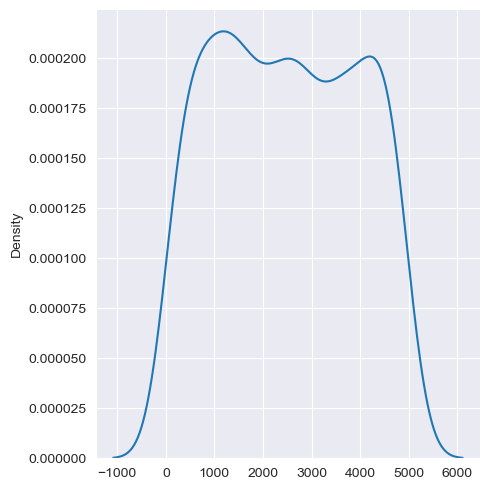

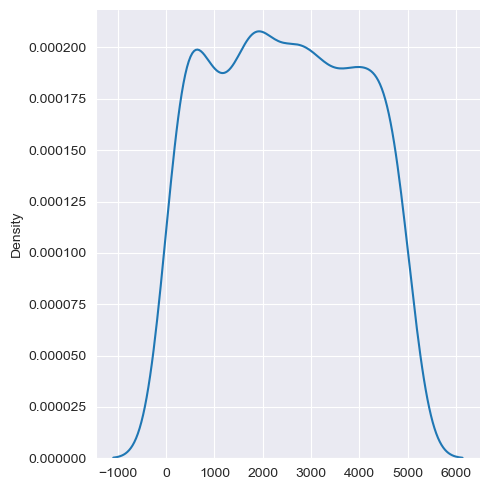

In [55]:
x1 = YieldA
x2 = YieldB

Vx1 = YieldA
Vx2 = YieldB

# TODO try to fix hist=True as its been deprecated
print("PlotA and PlotB seperately")
sns.displot(YieldA, kind="kde")
sns.displot(YieldB, kind="kde")

/var/folders/v0/7gtj3bhx74z6w7kx78fhqlmm0000gn/T/ipykernel_22957/3498676917.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(YieldA,hist=True)
/var/folders/v0/7gtj3bhx74z6w7kx78fhqlmm0000gn/T/ipykernel_22957/3498676917.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(YieldB,hist=True)


PlotA and PlotB together


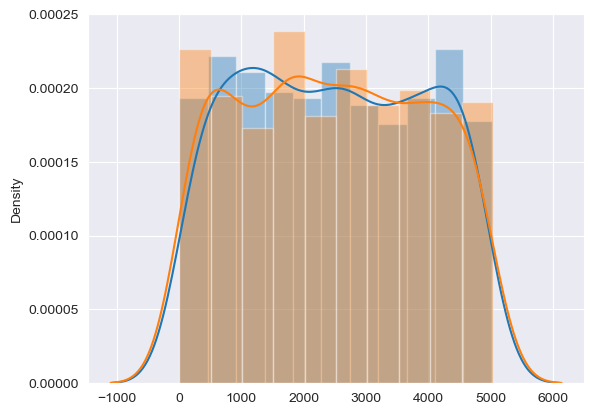

In [56]:
sns.distplot(YieldA,hist=True)
sns.distplot(YieldB,hist=True)
print("PlotA and PlotB together")

In [44]:
# change to pandas dataframes
# TODO update "AttributeError: 'list' object has no attribute 'describe'"
df_A.describe
df_B.describe

<bound method NDFrame.describe of         0
0    3352
1     174
2    1661
3    1984
4    1518
..    ...
995  4707
996  1758
997   403
998   492
999  4042

[1000 rows x 1 columns]>

In [45]:
print("Calculating Statistical Analysis:")
alpha = 0.03                                                 # significance level = 5%
n1, n2 = len(x1), len(x2)                                    # sample sizes
s1, s2 = np.var(x1, ddof=1), np.var(x2, ddof=1)              # sample variances
s = np.sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2)) # pooled standard deviation
df = n1 + n2 - 2                                             # degrees of freedom
t = stats.t.ppf(1 - alpha/2, df)                             # t-critical value for 95% CI
test_results = stats.ttest_ind(x1, x2, equal_var=True)
print("\nHere are my current t test results ==>", test_results)


#lower = (np.mean(x1) - np.mean(x2)) - t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s
#upper = (np.mean(x1) - np.mean(x2)) + t * np.sqrt(1 / len(x1) + 1 / len(x2)) * s

Calculating Statistical Analysis:

Here are my current t test results ==> Ttest_indResult(statistic=0.25917648415439404, pvalue=0.7955257735681125)


In [46]:
print("Generate Statistical Analysis Readout:")
#print("Lower = " + str(lower))
#print("Upper = " + str(upper))
print("YieldA Sample Size = " + str(n1))
print("YieldB Sample Size = " + str(n2))
print("YieldA Sample Variance = " + str(s1))
print("YieldB Sample Variance = " + str(s2))
print("Alpha = " + str(alpha))
print("Pooled Standard Deviation = " + str(s))
print("Degrees of Freedom = " + str(df))
print("Alpha = " + str(alpha))
print("t-critical value for 97% CI = " + str(t))

Generate Statistical Analysis Readout:
YieldA Sample Size = 1000
YieldB Sample Size = 1000
YieldA Sample Variance = 2082470.5916306307
YieldB Sample Variance = 2130764.585269269
Alpha = 0.03
Pooled Standard Deviation = 1451.4191635947038
Degrees of Freedom = 1998
Alpha = 0.03
t-critical value for 97% CI = 2.1716417099989087


In [47]:
r = stats.ttest_ind(YieldA, YieldB, equal_var=False)
r

Ttest_indResult(statistic=0.25917648415439404, pvalue=0.7955257770758422)

In [48]:
r.statistic , r.pvalue

(0.25917648415439404, 0.7955257770758422)

In [49]:
print("The r stat = ", r.statistic)
print("The r pvalue = ", r.pvalue)
print(r.statistic, r.pvalue)

A_mean_pts = statistics.mean(Vx1)
B_mean_pts = statistics.mean(Vx2)

print("Mean Points for A =", A_mean_pts)
print("Mean Points for B =", B_mean_pts)

tstat, pval = ttest_1samp(YieldA, 110)

print("The T Stat = %.2f, and the P Value = %.4f" % (tstat, pval))
print("T Stat = %.2f, P Value = %.4f" % (tstat, pval))
if pval < 0.03:
    print("You should reject the null hypothesis")
else:
    print("You should accept the null hypothesis")

The r stat =  0.25917648415439404
The r pvalue =  0.7955257770758422
0.25917648415439404 0.7955257770758422
Mean Points for A = 2483.469
Mean Points for B = 2466.646
The T Stat = 52.01, and the P Value = 0.0000
T Stat = 52.01, P Value = 0.0000
You should reject the null hypothesis


In [50]:
population = 'number of subjects in population sample'
unit_measure = population

if pval < 0.03:
    print("You should reject the null hypothesis which again was... that YieldA was equal to YieldB"
          f"so we can say we have statistically significant proof of {unit_measure} imbalance")
# TODO create a valence switch
else:
    print(f"You should accept the null hypothesis which again was... that YieldA was not equal to YieldB"
          "so we would have statistically significant data, from a sufficent sample to say that "
          "YieldA is either greater than or less than YieldB and worth the risk or investment")


You should reject the null hypothesis which again was... that YieldA was equal to YieldBso we can say we have statistically significant proof of number of subjects in population sample imbalance
